In [2]:
import copy
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy import stats

from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# data = pd.read_csv("data/all_data.csv")

desc = joblib.load('./p/0005_n1/best_0005_10.pkl')
desc_raw = joblib.load('./p/0005_n1/raw_0005_10.pkl')
df_train = joblib.load('./p/0005/train_0005.pkl')
df_test = joblib.load('./p/0005/test_0005.pkl')

pic = pd.read_csv("data/pIC50_target.csv")
df_pic = pic['pIC50']

In [105]:
X_train = df_train.loc[:,desc].to_numpy()
X_test = df_test.loc[:,desc].to_numpy()
y_train = df_train.iloc[:,[-1]].to_numpy()
y_test = df_test.iloc[:,[-1]].to_numpy()
ytrain =  df_train.iloc[:,[-1]]
ytest =  df_test.iloc[:,[-1]]

scaler = MinMaxScaler()
scaler.fit(X_train)
scale_x_train = scaler.transform(X_train)
scale_x_test = scaler.transform(X_test)

param_grid={
            'C': 10,
            'gamma': 'auto',
            'epsilon':0.1
}

c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)

# Plot 1

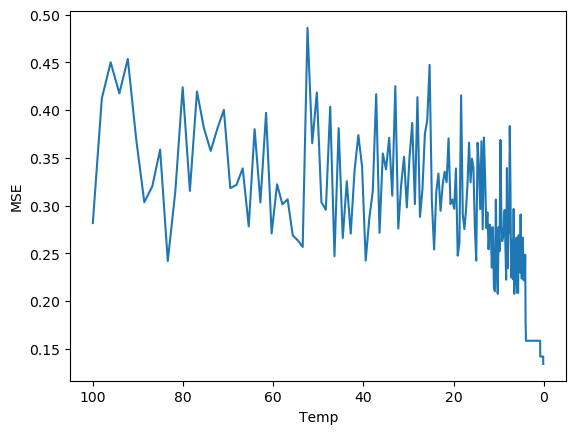

In [74]:
df = desc_raw.copy()
df.sort_values('MSE', inplace = True)

temp = df.iloc[0,3]
growth = df.iloc[0,2]

fig = plt.figure()
plt.plot(temp, growth)
plt.xlabel('Temp')
plt.ylabel('MSE')
# plt.ylim(0.1, 0.55)
plt.xlim(105,-5)
# plt.savefig('./graph/growth_mse_10desc.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

In [60]:
%% Hidden
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = desc_raw.copy()
df.sort_values('MSE', inplace = True)

obj = df.iloc[0,3]
obj_format = []

for i in obj:
    if isinstance(i, float):
        dec = '%.1f' % i
        obj_format.append(dec)
    else:
        obj_format.append(i)
        
y_pos = np.arange(len(obj_format))
performance = df.iloc[0,2]

# fig = plt.figure(figsize=(10, 6))
fig = plt.figure()
# plt.bar(y_pos, performance, align='center')
plt.plot(y_pos, performance)
# plt.xticks(y_pos, obj_format)
plt.xlabel('Temp')
plt.ylabel('MSE')
# plt.title('5 Descriptors')
# plt.ylim(0.16, 0.4)
# plt.xlim(350,0)
plt.xticks()
# plt.grid()
# plt.savefig('./growth_mse25_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

UsageError: Cell magic `%%` not found.


In [77]:
### obtain 20 run

df = desc_5_raw.copy()
dfs = df.copy()
dfs.sort_values('MSE', inplace = True)
top_row = dfs.index[0:20]
top_row = top_row.to_numpy()
top_row.sort()

col=['MSE', 'solution', 'growth', 'temp']
df_real = pd.DataFrame(columns=col)

for i in range(len(top_row)):
    df_real.loc[i] = df.loc[top_row[i],:]

joblib.dump(df_real,'./pickle/with_temp/raw_25neue_real.pkl')

['./pickle/with_temp/raw_25neue_real.pkl']

# Plot 2

In [44]:
df_sort = desc_raw.copy()
df_sort.sort_values('MSE', inplace = True)
# df_sort['MSE'].shape, len(df_sort['MSE'])

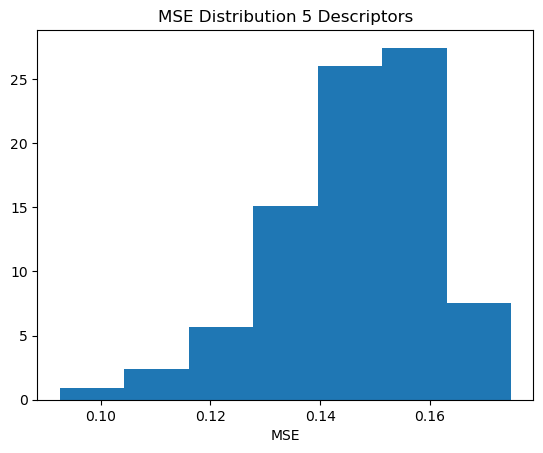

In [19]:
### Plot two 
df_sort = desc_raw.copy()
df_sort.sort_values('MSE', inplace = True)
# df_sort

fig = plt.figure()

plt.hist(df_sort['MSE'], density=True, bins=7)
plt.title('MSE Distribution 5 Descriptors')
plt.xlabel('MSE')
# plt.savefig('./msedist_5desc.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

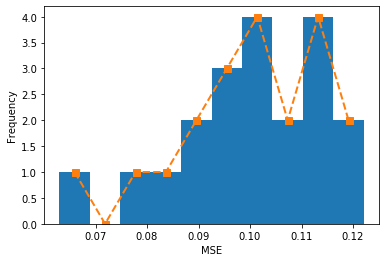

In [21]:
bean = 10
df_sort = desc_raw.copy()
df_sort.sort_values('MSE', inplace = True)

data = df_sort['MSE']
y, binEdges =np.histogram(data,bins=bean)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(df_sort['MSE'],bins=bean)
plt.plot(bincenters,y,'--', lw = 2, marker='s', markersize='7')
plt.xlabel('MSE')
# plt.ylim(0,6)
plt.ylabel('Frequency')
# plt.savefig('./graph/msedist_10desc.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

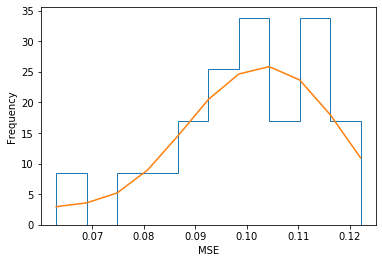

In [22]:
# # ### 

df = desc_raw.copy()
# df.sort_values('MSE', inplace = True)

mse_temp = df.iloc[:,0]
# mse_trial

noise = mse_temp
density = stats.gaussian_kde(noise)
n, x, _ = plt.hist(noise, bins=10, histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.show()

# Plot 3

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1256.01it/s]


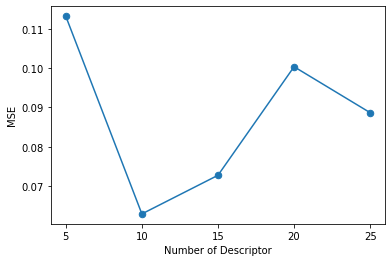

In [113]:
bd_list = []
bd_5 = joblib.load('./p/0005_n1/raw_0005_5.pkl')
bd_10 = joblib.load('./p/0005_n1/raw_0005_10.pkl')
bd_15 = joblib.load('./p/0005_n1/raw_0005_15.pkl')
bd_20 = joblib.load('./p/0005_n1/raw_0005_20.pkl')
bd_25 = joblib.load('./p/0005_n1/raw_0005_25.pkl')
bd_list.extend([bd_5,bd_10,bd_15,bd_20,bd_25])

list_MSE = []
df_mse = pd.DataFrame(columns=['desc','mse'])

for i in tqdm(range(len(bd_list))):
    bd_list[i].sort_values('MSE', inplace = True)
    list_MSE.append(bd_list[i].iloc[0,0])
     
df_mse['desc'] = [5,10,15,20,25]
df_mse['mse'] = list_MSE

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.set_xticks(x)

plt.xlabel('Number of Descriptor')
plt.ylabel('MSE')
plt.plot(x, df_mse['mse'], marker='.' ,markersize=13)
plt.show()



# Histogram pIC50

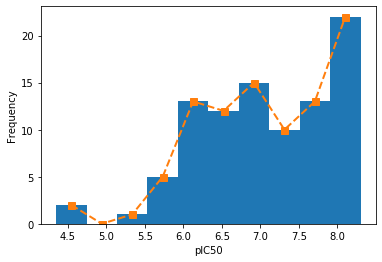

In [9]:
import scipy.stats as stats

df_target = pd.read_csv("data/pIC50_target.csv")
bean = 10
# df_sort = desc_5_raw.copy()
# df_sort.sort_values('MSE', inplace = True)

data = df_target['pIC50']
y, binEdges = np.histogram(data,bins=bean)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(df_target['pIC50'], bins=bean)
plt.plot(bincenters,y,'--', lw = 2, marker='s', markersize='7')
# plt.title('pIC50 Activity')
plt.xlabel('pIC50')
plt.ylabel('Frequency')
# plt.ylim(0, 14) 
plt.savefig('./graph/pic50Activity10bin.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

# RBF

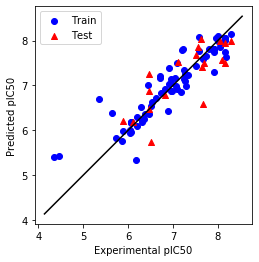

In [109]:
#########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 10,
            'gamma': 'scale',
            'epsilon':0.1
}
c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)
model.fit(scale_x_train, y_train)
y_train_pred = model.predict(scale_x_train)
y_test_pred = model.predict(scale_x_test)

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test',marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
# plt.title('RBF Actual Vs Predict')
# plt.savefig('./graph/actpred_rbf_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

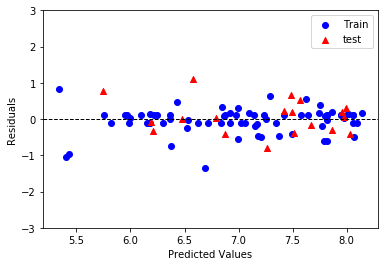

In [110]:
################
### Residual ###
################

param_grid={
            'C': 10,
            'gamma': 'scale',
            'epsilon':0.1
}
c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)
model.fit(scale_x_train, y_train)
y_train_pred = model.predict(scale_x_train)
y_test_pred = model.predict(scale_x_test)


ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
# plt.title('Residual SVR RBF')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.savefig('./graph/res_rbf_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()


# Linear

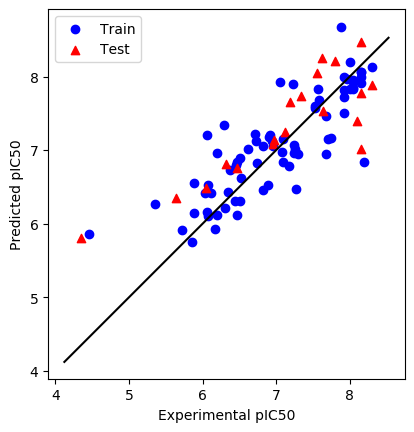

In [43]:
# #########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 100,
            'degree': 1,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

model_lin = SVR(kernel="linear", C= c, degree= deg, epsilon=eps)
model_lin.fit(scale_x_train, y_train)
y_train_pred = model_lin.predict(scale_x_train)
y_test_pred = model_lin.predict(scale_x_test)

ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test', marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

# plt.title('Linear Actual Vs Predict')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
# plt.savefig('./graph/actpred_linear_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

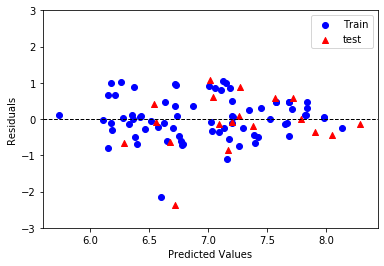

In [28]:
################
### Residual ###
################

param_grid={
            'C': 1,
            'degree': 1,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

model_lin = SVR(kernel="linear", C= c, degree= deg, epsilon=eps)
model_lin.fit(scale_x_train, y_train)
y_train_pred = model_lin.predict(scale_x_train)
y_test_pred = model_lin.predict(scale_x_test)

ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
# plt.title('Residual SVR Linear')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('./graph/res_linear_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()


# Poly

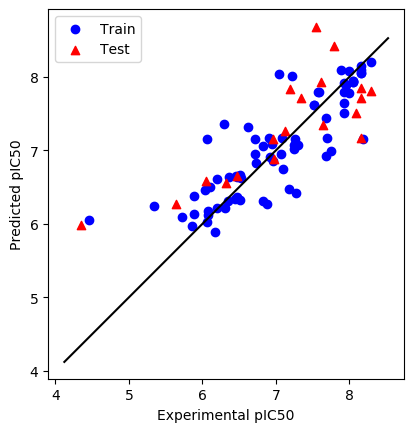

In [42]:
#########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 10,
            'degree': 2,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

modelPol = SVR(kernel="poly", C= c, degree= deg, epsilon=eps)
modelPol.fit(scale_x_train, y_train)
y_train_pred = modelPol.predict(scale_x_train)
y_test_pred = modelPol.predict(scale_x_test)

ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test' , marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

# plt.title('Poly Actual Vs Predict')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.savefig('./graph/actpred_poly_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

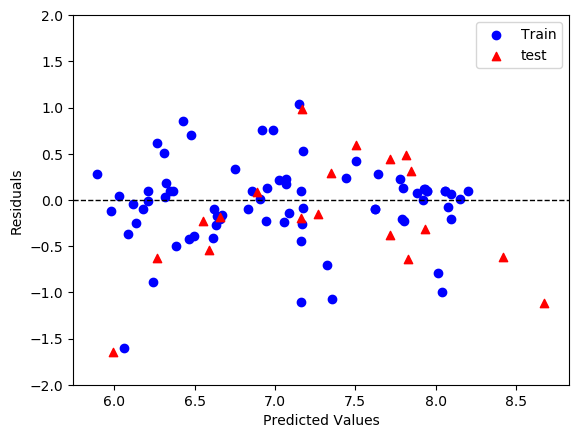

In [37]:
################
### Residual ###
################

param_grid={
            'C': 10,
            'degree': 2,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

modelPol = SVR(kernel="poly", C= c, degree= deg, epsilon=eps)
modelPol.fit(scale_x_train, y_train)
y_train_pred = modelPol.predict(scale_x_train)
y_test_pred = modelPol.predict(scale_x_test)

ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
# plt.title('Residual SVR Poly')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.savefig('./graph/res_pred_poly.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()


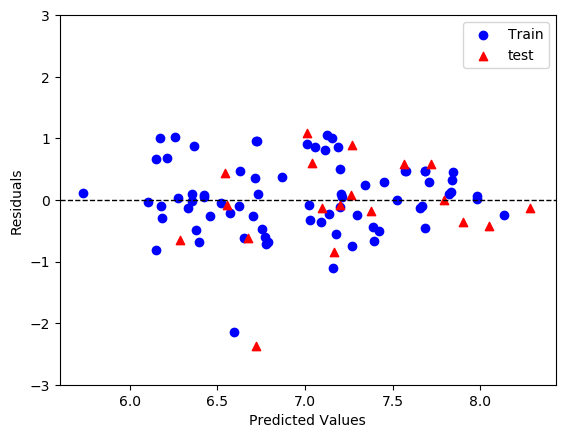

In [40]:
################
### Residual ###
################

param_grid={
            'C': 1,
            'degree': 1,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

model_lin = SVR(kernel="linear", C= c, degree= deg, epsilon=eps)
model_lin.fit(scale_x_train, y_train)
y_train_pred = model_lin.predict(scale_x_train)
y_test_pred = model_lin.predict(scale_x_test)

ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
# plt.title('Residual SVR Linear')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('./graph/res_linear_06.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()
